In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:06<00:00, 54.2MB/s]
100% 1.06G/1.06G [00:06<00:00, 184MB/s] 


In [ ]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats',
    batch_size = 32,
    image_size = (256,256),
    labels = "inferred",
    label_mode = 'int'
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats',
    batch_size = 32,
    image_size = (256,256),
    labels = "inferred",
    label_mode = 'int'
)

Found 25000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [ ]:
#normalizing the dataset
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

In [ ]:
#first convolution layer
model.add(Conv2D(32, kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

#second convolution layer
model.add(Conv2D(64, kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

#third convolution layer
model.add(Conv2D(128, kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

#convert data into 1-D array
model.add(Flatten())

#first hidden layer
model.add(Dense(128,activation = 'relu'))
#second hidden layer
model.add(Dense(64,activation = 'relu'))

#output layer - 1 output since its a binary classsification
model.add(Dense(1,activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dog_image = plt.imread(r'/content/dogs_vs_cats/train/dogs/dog.1000.jpg')

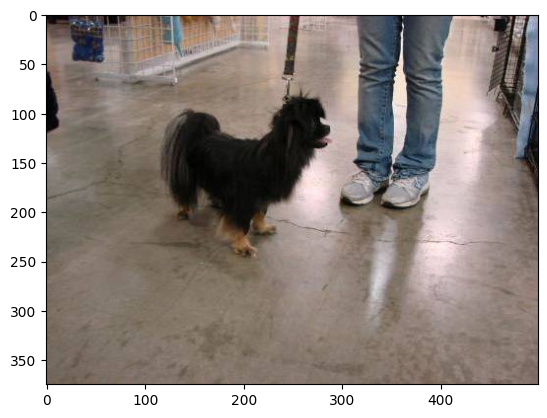

In [ ]:
plt.imshow(dog_image)

In [ ]:
cat_image = plt.imread(r'/content/dogs_vs_cats/train/cats/cat.1000.jpg')

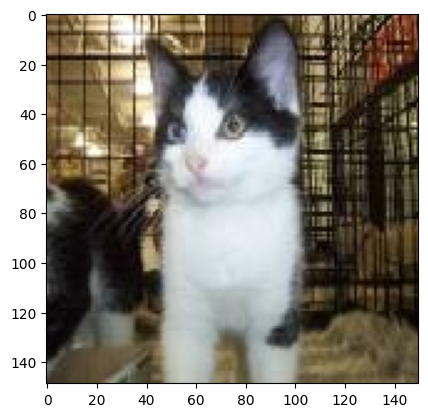

In [ ]:
plt.imshow(cat_image)

In [ ]:
model.fit(train_ds,epochs = 2, validation_data = validation_ds)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 118ms/step - accuracy: 0.8038 - loss: 0.5159 - val_accuracy: 0.8000 - val_loss: 0.5003
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.8039 - loss: 0.4970 - val_accuracy: 0.8000 - val_loss: 0.5004


In [ ]:
import cv2
dog_resize = cv2.resize(dog_image,(256,256))

In [ ]:
cat_resize = cv2.resize(cat_image,(256,256))

In [ ]:
dog_resize.shape

(256, 256, 3)

In [ ]:
cat_resize.shape

(256, 256, 3)

In [ ]:
dog_resize = dog_resize.reshape(1,256,256,3)
cat_resize = cat_resize.reshape(1,256,256,3)

In [ ]:
dog_resize.shape

(1, 256, 256, 3)

In [ ]:
pred = model.predict(dog_resize)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
model.predict(cat_resize)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.99999213]], dtype=float32)

In [ ]:
if pred == 0:
  print('The image is a cat')
else:
  print('The image is a dog')

The image is a dog
